In [133]:
#import the packages
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/peize/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


###Data prepration

In [134]:
import pandas as pd
!pip install plotly
#read the csv file
df = pd.read_csv('spotify.csv')
df.head()

#We only want data after 1980 because no one really listen to the songs before this time
df = df.loc[(df.year > 1980)]

df.head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
4154,0.688000,['David Allan Coe'],0.675,179560,0.368,0,79K36XF7WlgTvP3JbW17UE,0.000000,2,0.0612,-11.337,1,Tennessee Whiskey,28,1981-08-01,0.0287,105.677,0.4720,1981
4155,0.311000,['Stan Rogers'],0.728,190653,0.820,0,1RqsqWiZNe4yIWkC5Cjvq6,0.000506,7,0.2620,-7.588,1,Canol Road,33,1981,0.0485,122.228,0.7810,1981
4156,0.305000,['Black Flag'],0.333,145933,0.712,0,35BOEtOvV1qwzjblSKcPJ1,0.950000,2,0.3590,-15.726,1,No More,30,1981,0.1030,112.776,0.0279,1981
4157,0.000108,['Def Leppard'],0.345,193106,0.944,0,4uS6cFeJsUGWMRJCC8j5oZ,0.614000,2,0.7050,-7.320,1,No No No,30,1981-07-11,0.0677,97.945,0.4960,1981
4158,0.066000,['Kool & The Gang'],0.901,255600,0.550,0,2E5I3d41LCqAJPWmSzrVXv,0.001130,1,0.0396,-15.008,0,Be My Lady,38,1981,0.0339,124.479,0.9830,1981
4159,0.010600,['Crass'],0.620,237640,0.996,0,6m5LdqzYJPL8gNwwerAXjB,0.000000,2,0.0583,-8.284,1,Systemic Death,31,1981-01-01,0.1160,111.956,0.1850,1981
4160,0.837000,['Leo Dan'],0.488,189547,0.267,0,7t7jQXStfDGkZBxbKMXwV9,0.034200,1,0.1190,-16.019,0,Tengo Todo por Hacer,39,1981,0.0451,90.701,0.2400,1981
4161,0.204000,['Tom Petty and the Heartbreakers'],0.640,202867,0.777,0,1ruNQCGE5wAh4ouGcLjEcI,0.000000,5,0.0654,-7.057,1,Letting You Go,27,1981-05-05,0.0338,106.623,0.6790,1981
4162,0.008160,['Billy Squier'],0.336,176987,0.884,0,2HzDmnAxKk767YueykEGbr,0.000203,4,0.0825,-5.830,0,You Know What I Like - Remastered,29,1981,0.1290,136.685,0.6350,1981
4163,0.789000,['Black Sabbath'],0.149,171947,0.344,0,2lwdQsBtFYBNnXhRNTB90D,0.967000,10,0.1200,-19.607,0,E5150 - 2008 Remaster,27,1981-11-04,0.0584,77.471,0.0922,1981


In [150]:

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Plot a graph to see the overall Popularity among the songs
fig = px.histogram(df, x="popularity")
fig.update_traces(marker_color="pink",marker_line_color='rgb(111,222,333)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Popularity')
fig.show()

###Data Cleansing

In [136]:

df["row_id"] = df.index + 1
###drop the data in name colunm that contains "$"
df.drop(index=df[df['name'].str.contains("\\$")].index, inplace=True)
df

df.head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,row_id
4154,0.688000,['David Allan Coe'],0.675,179560,0.368,0,79K36XF7WlgTvP3JbW17UE,0.000000,2,0.0612,-11.337,1,Tennessee Whiskey,28,1981-08-01,0.0287,105.677,0.4720,1981,4155
4155,0.311000,['Stan Rogers'],0.728,190653,0.820,0,1RqsqWiZNe4yIWkC5Cjvq6,0.000506,7,0.2620,-7.588,1,Canol Road,33,1981,0.0485,122.228,0.7810,1981,4156
4156,0.305000,['Black Flag'],0.333,145933,0.712,0,35BOEtOvV1qwzjblSKcPJ1,0.950000,2,0.3590,-15.726,1,No More,30,1981,0.1030,112.776,0.0279,1981,4157
4157,0.000108,['Def Leppard'],0.345,193106,0.944,0,4uS6cFeJsUGWMRJCC8j5oZ,0.614000,2,0.7050,-7.320,1,No No No,30,1981-07-11,0.0677,97.945,0.4960,1981,4158
4158,0.066000,['Kool & The Gang'],0.901,255600,0.550,0,2E5I3d41LCqAJPWmSzrVXv,0.001130,1,0.0396,-15.008,0,Be My Lady,38,1981,0.0339,124.479,0.9830,1981,4159
4159,0.010600,['Crass'],0.620,237640,0.996,0,6m5LdqzYJPL8gNwwerAXjB,0.000000,2,0.0583,-8.284,1,Systemic Death,31,1981-01-01,0.1160,111.956,0.1850,1981,4160
4160,0.837000,['Leo Dan'],0.488,189547,0.267,0,7t7jQXStfDGkZBxbKMXwV9,0.034200,1,0.1190,-16.019,0,Tengo Todo por Hacer,39,1981,0.0451,90.701,0.2400,1981,4161
4161,0.204000,['Tom Petty and the Heartbreakers'],0.640,202867,0.777,0,1ruNQCGE5wAh4ouGcLjEcI,0.000000,5,0.0654,-7.057,1,Letting You Go,27,1981-05-05,0.0338,106.623,0.6790,1981,4162
4162,0.008160,['Billy Squier'],0.336,176987,0.884,0,2HzDmnAxKk767YueykEGbr,0.000203,4,0.0825,-5.830,0,You Know What I Like - Remastered,29,1981,0.1290,136.685,0.6350,1981,4163
4163,0.789000,['Black Sabbath'],0.149,171947,0.344,0,2lwdQsBtFYBNnXhRNTB90D,0.967000,10,0.1200,-19.607,0,E5150 - 2008 Remaster,27,1981-11-04,0.0584,77.471,0.0922,1981,4164


In [137]:
#Make a new dataframe that only shows row id and name of the song
df_subset = df[['row_id', 'name']].copy()
#Delete the spceical characters in the name of songs
df_subset['name'] = df_subset['name'].str.replace("[^a-zA-Z#]", " ")
df_subset['name'] = df_subset['name'].replace(r'\s+', ' ', regex=True)
#lowercase the names
df_subset['name'] = df_subset['name'].str.casefold()
df_subset.head(10)

/var/folders/1m/4krp__jx0_l_0mznsqn2fpz00000gn/T/ipykernel_12859/1974196384.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



,row_id,name
4154,4155,tennessee whiskey
4155,4156,canol road
4156,4157,no more
4157,4158,no no no
4158,4159,be my lady
4159,4160,systemic death
4160,4161,tengo todo por hacer
4161,4162,letting you go
4162,4163,you know what i like remastered
4163,4164,e remaster


In [138]:
#Create a new dataframe showing the sentiment score
df1=pd.DataFrame()
df1['row_id']=['9999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

###Run the model

In [139]:
#Run the sentiment score model
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)

t_df_cleaned = t_df[t_df.row_id != '9999999']

t_df_cleaned = t_df_cleaned.drop_duplicates()

t_df_cleaned = t_df[t_df.sentiment_type == 'compound']

print(t_df_cleaned.head(10))

   row_id sentiment_type  sentiment_score
0    4155       compound           0.0000
0    4156       compound           0.0000
0    4157       compound          -0.2960
0    4158       compound          -0.6808
0    4159       compound           0.0000
0    4160       compound          -0.5994
0    4161       compound           0.0000
0    4162       compound           0.0000
0    4163       compound           0.3612
0    4164       compound           0.0000


In [140]:
#merge the sentiment score with the original dataset
df_output = pd.merge(df, t_df_cleaned, on='row_id', how='inner')
df_output.head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,name,popularity,release_date,speechiness,tempo,valence,year,row_id,sentiment_type,sentiment_score
0,0.688000,['David Allan Coe'],0.675,179560,0.368,0,79K36XF7WlgTvP3JbW17UE,0.000000,2,0.0612,...,Tennessee Whiskey,28,1981-08-01,0.0287,105.677,0.4720,1981,4155,compound,0.0000
1,0.311000,['Stan Rogers'],0.728,190653,0.820,0,1RqsqWiZNe4yIWkC5Cjvq6,0.000506,7,0.2620,...,Canol Road,33,1981,0.0485,122.228,0.7810,1981,4156,compound,0.0000
2,0.305000,['Black Flag'],0.333,145933,0.712,0,35BOEtOvV1qwzjblSKcPJ1,0.950000,2,0.3590,...,No More,30,1981,0.1030,112.776,0.0279,1981,4157,compound,-0.2960
3,0.000108,['Def Leppard'],0.345,193106,0.944,0,4uS6cFeJsUGWMRJCC8j5oZ,0.614000,2,0.7050,...,No No No,30,1981-07-11,0.0677,97.945,0.4960,1981,4158,compound,-0.6808
4,0.066000,['Kool & The Gang'],0.901,255600,0.550,0,2E5I3d41LCqAJPWmSzrVXv,0.001130,1,0.0396,...,Be My Lady,38,1981,0.0339,124.479,0.9830,1981,4159,compound,0.0000
5,0.010600,['Crass'],0.620,237640,0.996,0,6m5LdqzYJPL8gNwwerAXjB,0.000000,2,0.0583,...,Systemic Death,31,1981-01-01,0.1160,111.956,0.1850,1981,4160,compound,-0.5994
6,0.837000,['Leo Dan'],0.488,189547,0.267,0,7t7jQXStfDGkZBxbKMXwV9,0.034200,1,0.1190,...,Tengo Todo por Hacer,39,1981,0.0451,90.701,0.2400,1981,4161,compound,0.0000
7,0.204000,['Tom Petty and the Heartbreakers'],0.640,202867,0.777,0,1ruNQCGE5wAh4ouGcLjEcI,0.000000,5,0.0654,...,Letting You Go,27,1981-05-05,0.0338,106.623,0.6790,1981,4162,compound,0.0000
8,0.008160,['Billy Squier'],0.336,176987,0.884,0,2HzDmnAxKk767YueykEGbr,0.000203,4,0.0825,...,You Know What I Like - Remastered,29,1981,0.1290,136.685,0.6350,1981,4163,compound,0.3612
9,0.789000,['Black Sabbath'],0.149,171947,0.344,0,2lwdQsBtFYBNnXhRNTB90D,0.967000,10,0.1200,...,E5150 - 2008 Remaster,27,1981-11-04,0.0584,77.471,0.0922,1981,4164,compound,0.0000


In [141]:
#show the overall info about the name's sentiment score
df_output[["sentiment_score"]].describe()

,sentiment_score
count,79547.000000
mean,0.027004
std,0.259559
min,-0.964300
25%,0.000000
50%,0.000000
75%,0.000000
max,0.957100


<AxesSubplot:title={'center':'Sentiment Score'}, xlabel='Year', ylabel='Mean Sentiment Score'>

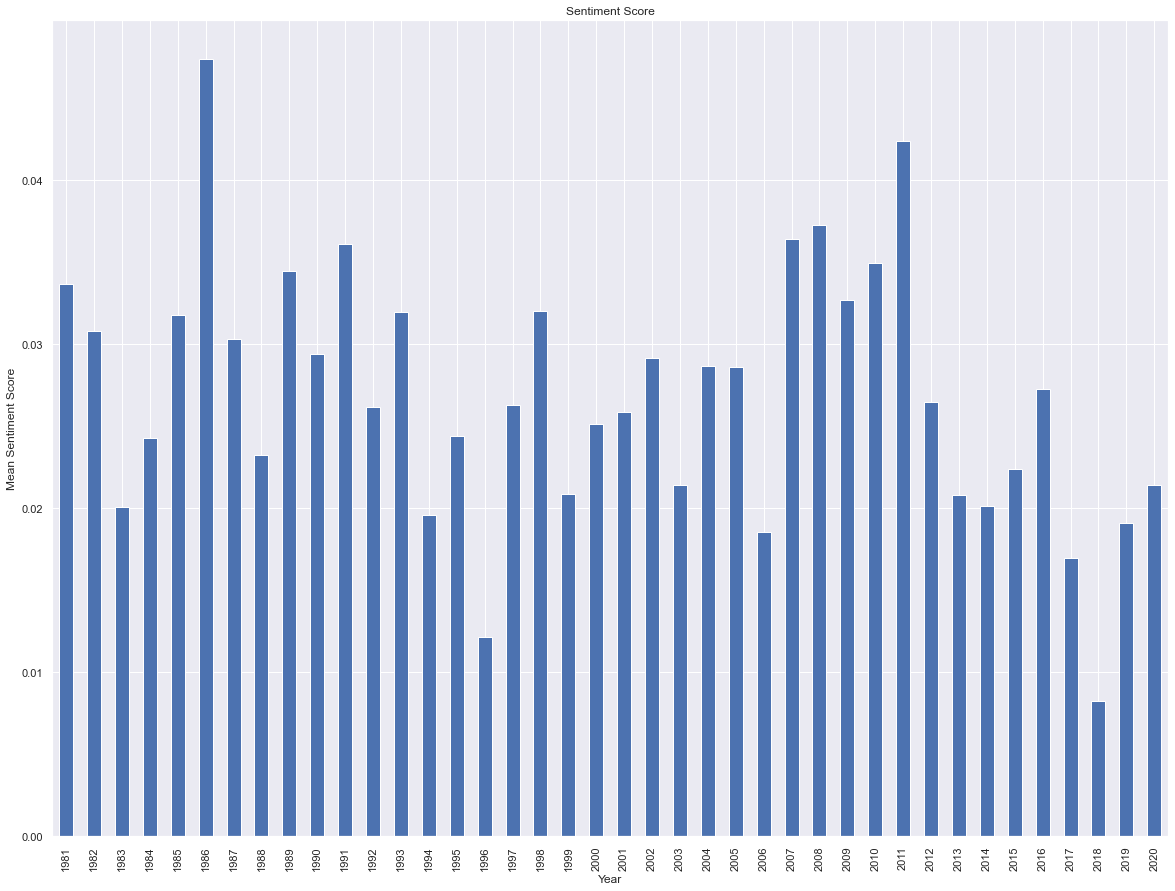

In [142]:
#Show the relation ship between popularity vs. mean Sentiment score
dfg = df_output.groupby(['year'])['sentiment_score'].mean()

dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Year', figsize=(20, 15))

In [143]:
#Show the name of songs that has the highest sentiment score and its popularity
pd.set_option('display.max_rows', None)
df_output[['name', 'sentiment_score','popularity']].sort_values(by='sentiment_score', ascending=False).head(6)

,name,sentiment_score,popularity
39,"Love Me Tonight (Love, Love, Love)",0.9571,41
65647,432Hz Miracle Tone: Raise Positive Vibrations ...,0.9413,49
33243,"My Love, Sweet Love - from Waiting to Exhale -...",0.9287,33
15172,Love Love Love,0.9274,47
11167,Love Love Love,0.9274,57
27242,Let Me Love You (Until You Learn To Love Yours...,0.9274,56


In [144]:
df_output[['name', 'sentiment_score','popularity']].sort_values(by='sentiment_score', ascending=True).head(6)

,name,sentiment_score,popularity
36098,"No Fear, No Hate, No Pain (No Broken Hearts) -...",-0.9643,29
5407,Die Die Die,-0.9136,37
22587,Die Die Die,-0.9136,42
19691,Gang Shit No Lame Shit,-0.9042,59
1420,"Shit, Damn, Motherfucker",-0.8979,42
23103,Fuck The Po-Po - Live,-0.8934,45


<AxesSubplot:title={'center':'Sentiment Score'}, xlabel='Popularity', ylabel='Mean Sentiment Score'>

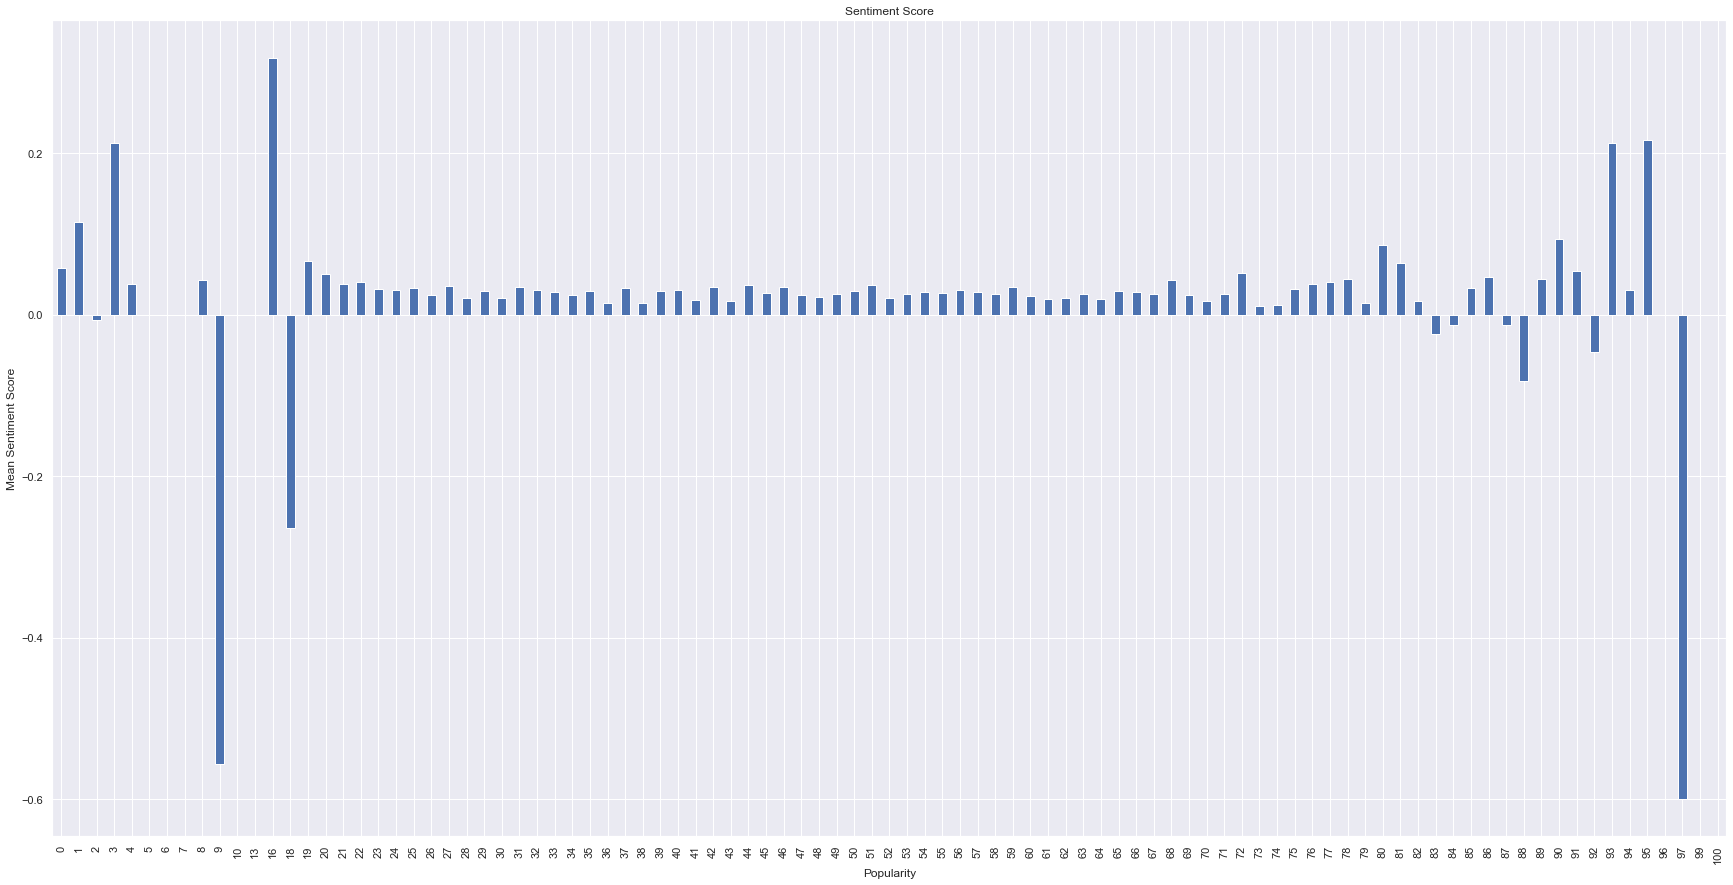

In [145]:
#Shows the relationship between Sentiment Score and Popularity
#df_output = df_output.loc[(df_output.popularity > 80)]
dfg = df_output.groupby(['popularity'])['sentiment_score'].mean()
#df = df.loc[(df.year > 1980)]
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Popularity', figsize=(30, 15))